# Центральная предельная теорема своими руками
## Экспоненциальное распределение

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

In [2]:
# генеруем выборку объема 1000 из распределения
rv = sts.expon() 
sample = rv.rvs(1000)

# расчитаем теоритеческую плотность вероятности (pdf - probability density function) для распределения
x = np.linspace(0,15,1000)
pdf = rv.pdf(x) 

Text(0, 0.5, '$f(x)$')

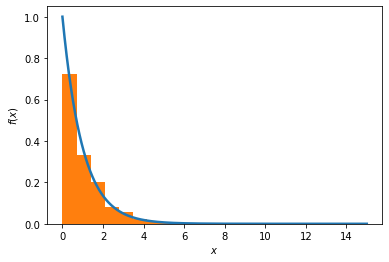

In [20]:
# построим гистограмму выборки и наложим на нее теоретическую оценку плотности вероятности экспоненциального распределения
plt.plot(x, pdf, linewidth = 2.5)
plt.hist(sample, density=True)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

In [21]:
# опишем функцию, которая для объема выборки n генерирует график гистограммы выборочных средних случайной величины
# и теоретической оценки плотности вероятности для распределения выборочных средних

def generate_pdf(n): 
    # сгенерируем выборочные средние по выборкам объема n
    means = []
    for _ in range(1000):
        sample = rv.rvs(n)
        sample_mean = np.mean(sample)
        means.append(sample_mean)
    
    # расчитаем теоритеческую плотность вероятности (pdf - probability density function) для нормального распределения
    mu = 1 # theoretical expectation
    sigma = (1./n) ** 0.5 # theoretical sigma
    norm_rv = sts.norm(loc=mu, scale=sigma)
    x = np.linspace(0,4,100)
    pdf = norm_rv.pdf(x)
    
    # построим гистограмму выборочных средних и наложим на нее теоретическую оценку плотности вероятности нормального 
    # распределения
    plt.plot(x, pdf, linewidth = 2.5)
    plt.hist(means, density=True)
    plt.xlabel('$\\bar{X}_n$')
    plt.ylabel('$f(\\bar{X}_n)$')
    plt.title('n = %d' % n)
    plt.show()

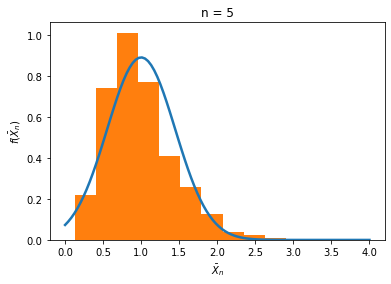

In [22]:
# построим гистограммы распределений выборочных средних и приближающих их нормальных распределений 
# при различных объемах выборок n
n = 5
generate_pdf(n)

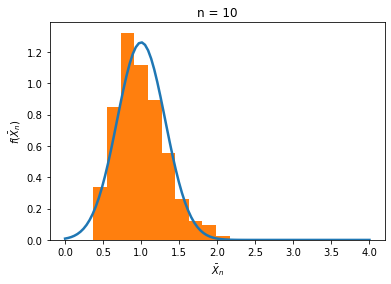

In [23]:
n = 10
generate_pdf(n)

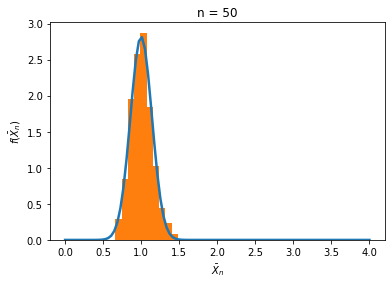

In [24]:
n = 50
generate_pdf(n)

#### Чем больше объем выборки n, тем лучше распределение выборочных средних соответствует приближающему его нормальному распределению